## Background

***

Given dataset
https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020

ABC Company, one of the largest motor spare part manufacturers in Asia, plans to open a branch in Indonesia. However, t**he company is facing issues with the performance of its production machinery. The machines frequently experience failures, which ultimately consume a significant amount of company resources, including time, costs, and labor.**

As a data scientist at ABC Company, I have been assigned to address this problem using a machine learning approach. The **main goal is to predict whether the machines are still in normal working condition or if they are damaged and require further maintenance.**

Available Data:
In this project, I have access to data collected from the production machines at ABC Company. The data includes information about machine indicators such as temperature, rotation speed, torque, usage time, and more.

Project Objective:
The objective of this project is to build a machine learning model to predict the status of the machines, whether they are still in normal working condition or if they are damaged and require further maintenance. By having an accurate predictive model, ABC Company can take preventive actions to avoid unexpected machine failures and optimize maintenance efforts.

Expected Benefits:
By implementing a machine learning model for predicting machine status, ABC Company expects the following benefits:
- Reduced machine failures: With early detection of potential failures, the company can perform preventive maintenance to prevent more severe damage and reduce the need for costly repairs.
- Resource optimization: By predicting machine status, the company can allocate resources efficiently and avoid using damaged machines.
- Reduced downtime: By identifying machines that require further maintenance, the company can take prompt and appropriate actions, reducing unexpected production downtime.
- Cost savings: By preventing unexpected machine failures, the company can avoid expensive repair costs and optimize the utilization of the maintenance budget.

With a machine learning approach and the implementation of a predictive model, ABC Company aims to improve operational efficiency and reduce costs associated with unexpected machine failures.

***

# **Binary Classification**

##**1. Business Understanding**

###**1.1. Business Goals & Metrics**

***

the goal is to build a machine learning model to predict the status of the machines, whether they are still in normal working condition or if they are damaged and require further maintenance


in this case, False positives can lead to unnecessary maintenance and resource utilization for ABC Company. Although conducting additional checks may reduce the risk of failures, the additional costs can be burdensome. On the other hand, false negatives pose the risk of undetected machine damage, which can result in greater losses, such as further machine breakdowns, decreased product quality, or even workplace accidents.

By **optimizing for F1-Score**, the model aims to achieve a balanced performance in terms of precision (minimizing false positives) and recall (minimizing false negatives). This ensures that the model can accurately identify both normal and faulty machines, thus reducing the potential for unnecessary maintenance and minimizing the risk of undetected damages.

***

##**2. Data Understanding**

###**2.1. About Dataset**

***

This dataset consists of 10 000 data points from a stored as rows with 14 features in columns

1. UID: unique identifier ranging from 1 to 10000
2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. type: just the product type L, M or H from column 2
4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
7. torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
10. tool wear failure (TWF)
11. heat dissipation failure (HDF)
12. power failure (PWF)
13. overstrain failure (OSF)
14. random failures (RNF)

***

###**2.2. Preparing Package**

In [2]:
!pip install pycaret
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 86.3 MB/s eta 0:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###**2.3. Build Dataframe**

In [4]:
!gdown 1zJ_1JUW7fqWgxNHz71ksCrfpnm2ouaHk

Downloading...
From: https://drive.google.com/uc?id=1zJ_1JUW7fqWgxNHz71ksCrfpnm2ouaHk
To: /content/ai4i2020.csv
100% 522k/522k [00:00<00:00, 20.7MB/s]


In [5]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### **2.4. Unnecessary Columns/Rows**

In [6]:
df = df.drop(['UDI','Product ID'],axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


###**2.5. Checking Rows & Columns**

In [7]:
print("Rows & Columns = ", df.shape)

Rows & Columns =  (10000, 12)


***

After dropping some columns, the dataset still have 12 columns

***

###**2.6. Checking Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


***
only 1 column having data type as object, column "Type" and in this case, is an ordinal data
***

##**3. Data Preprocessing**

###**3.1. Data Cleaning**

####**3.1.1. Normalize Column Name**

In [9]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [10]:
df.rename(columns = {'Type':'type',
                     'Air temperature [K]':'air_temperature_k',
                     'Process temperature [K]':'process_temperature_k',
                     'Rotational speed [rpm]':'rotational_speed_rpm',
                     'Torque [Nm]':'torque_nm',
                     'Tool wear [min]':'tool_wear_min',
                     'Machine failure':'machine_failure'}, inplace = True)
df.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


####**3.1.2. Handling Missing Value**

In [11]:
df.isnull().sum()

type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

***

no missing values, so we can move to next step

***

####**3.1.3. Mengecek Nilai Duplikat**

In [12]:
df.duplicated().sum()

0

***

no duplicate values, so we can move to next step

***

####**3.1.4. Obcejct Unique Value**

In [13]:
df['type'].unique()

array(['M', 'L', 'H'], dtype=object)

***

all value in object column is valid. M indicates that machine is producing medium quality product. L indicates that machine is producing low quality product & H indicates that machine is producing high quality product

***

#### **3.1.5. Handling Noise Data**

In [14]:
# machine_failure == 1 but there's no category type of failure
total_ntv_1 = df.machine_failure[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))].count()

# Show how much data
print('Total Rows = ', total_ntv_1)

# Display the rows
df[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))]

Total Rows =  9


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
1437,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0
5941,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0
6478,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0
8506,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0
9015,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0


***

Because it's only 9 rows, so idecided to drop those rows

***

In [15]:
# drop rows
df = df[~((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))]

# rhecheck
total_ntv_1 = df.machine_failure[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))].count()
print('Total Rows = ', total_ntv_1)


Total Rows =  0


In [16]:
# machine_failure == 0 but there's at least 1 type of failure is true
total_ntv_0 = df.machine_failure[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))].count()

# Show how much data
print('Total Rows = ', total_ntv_0)

# display rows
df[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))]

Total Rows =  18


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
1221,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


***

it's only 18 rows, but i decided to change machine_failure value to 1, because it maybe contain critical  information abaout the type of failure

***

In [17]:
# Replace Values
df.loc[(df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1), "machine_failure"] = 1

# Recheck
total_ntv_0 = df.machine_failure[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))].count()
print('Total Rows = ', total_ntv_0)

Total Rows =  0


####**3.1.6. Handling Outliers**

In [18]:
def outliers(self, fitur):
    # Calculating Q1 & q3
    Q1 = np.percentile(self[fitur], 25)
    Q3 = np.percentile(self[fitur], 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower bound & upper bound
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)

    # search outliers
    outliers = self[(self[fitur] < batas_bawah) | (self[fitur] > batas_atas)]

    # returning outliers data
    return outliers

pd.DataFrame.outliers = outliers

In [19]:
numeric_df = df.drop(['type', 'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1)
for column in numeric_df.columns:
    # Check outliers for the current column
    outliers = numeric_df.outliers(column)

    # Print the total number of rows containing outliers for the current column
    print(f"Total rows with outliers in {column}: {len(outliers)}")

Total rows with outliers in air_temperature_k: 0
Total rows with outliers in process_temperature_k: 0
Total rows with outliers in rotational_speed_rpm: 418
Total rows with outliers in torque_nm: 70
Total rows with outliers in tool_wear_min: 0


***

only 2 columns containing outliers and total rows is <5%, even if only <5%, i decided to keep this data bacuse it maybe contain critical information abaout the type of failure &  this data is really happen in real world

***

####**3.1.7. Checking Target Imbalance**

In [20]:
# Menghitung jumlah nilai unik dalam kolom 'machine_failure'
df['machine_failure'].value_counts()

0    9643
1     348
Name: machine_failure, dtype: int64

***

becouse target distribution is extremely imbalance, modeling should be using resampled data. in this case the method to resampled dataset is SMOTE, one of the method for oversampling data

***

###**3.2. Data Analysis**

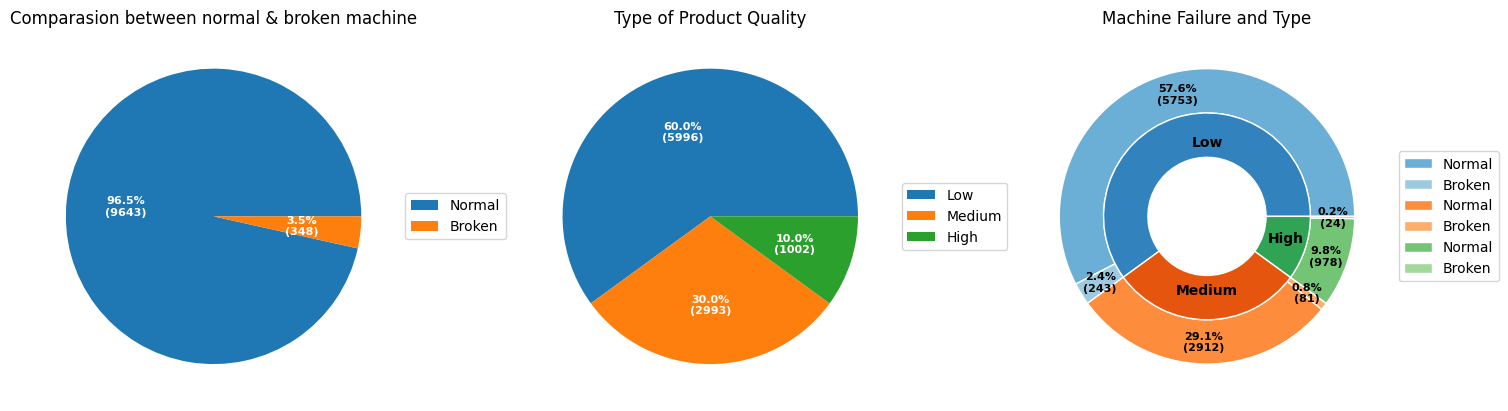

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(aspect="equal"))

# Plotting the first pie chart - Comparasion between normal & broken machine
normal, broken = df['machine_failure'].value_counts()
data1 = [normal, broken]
ingredients1 = ["Normal", "Broken"]

def func1(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges1, texts1, autotexts1 = ax1.pie(data1, autopct=lambda pct: func1(pct, data1),
                                      textprops=dict(color="w"))
ax1.legend(wedges1, ingredients1,
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts1, size=8, weight="bold")
ax1.set_title("Comparasion between normal & broken machine")

# Plotting the second pie chart - Type of Product Quality
low, medium, high = df['type'].value_counts()
data2 = [low, medium, high]
ingredients2 = ["Low", "Medium", "High"]

wedges2, texts2, autotexts2 = ax2.pie(data2, autopct=lambda pct: func1(pct, data2),
                                      textprops=dict(color="w"))
ax2.legend(wedges2, ingredients2,
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts2, size=8, weight="bold")
ax2.set_title("Type of Product Quality")

# Plotting the third pie chart - Machine Failure and Type
size = 0.3
h_n, h_b, l_n, l_b, m_n, m_b = df.groupby('type')['machine_failure'].value_counts()
vals = np.array([[l_n, l_b], [m_n, m_b], [h_n, h_b]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges_inner, texts_inner, autotexts_inner = ax3.pie(vals.flatten(), radius=1, colors=inner_colors,
                                                    wedgeprops=dict(width=size, edgecolor='w'),
                                                    autopct=lambda pct: func(pct, vals.flatten()) if pct > 0 else '',
                                                    pctdistance=0.85, labeldistance=0.7,
                                                    textprops=dict(color="black"))

wedges_outer, texts_outer, autotexts_outer = ax3.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
                                                    wedgeprops=dict(width=size, edgecolor='w'),
                                                    autopct='',
                                                    textprops=dict(color="black"))

# Add text labels for "Low," "Medium," and "High" inside the inner pie chart
textprops_inner = dict(color='black', weight='bold')
ax3.text(0, 0.5, 'Low', ha='center', va='center', fontdict=textprops_inner)
ax3.text(0, -0.5, 'Medium', ha='center', va='center', fontdict=textprops_inner)
ax3.text(0.53, -0.15, 'High', ha='center', va='center', fontdict=textprops_inner)

ax3.legend(wedges_inner, ['Normal', 'Broken', 'Normal', 'Broken', 'Normal', 'Broken'],
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts_inner, size=8, weight="bold")
plt.setp(autotexts_outer, size=8, weight="bold")

ax3.set(aspect="equal", title='Machine Failure and Type')

# Adjust the layout and spacing between subplots
fig.tight_layout()

plt.show()

***

Out of 9919 machines, 348 machines or 3.5% of the total, are experiencing failures. The machines are also categorized into three types: low, medium, and high, with a ratio of 6:3:1. Upon closer examination, machine failures predominantly occur in the ones producing low-quality products. Therefore, these machines require more attention compared to machines in other categories.

***

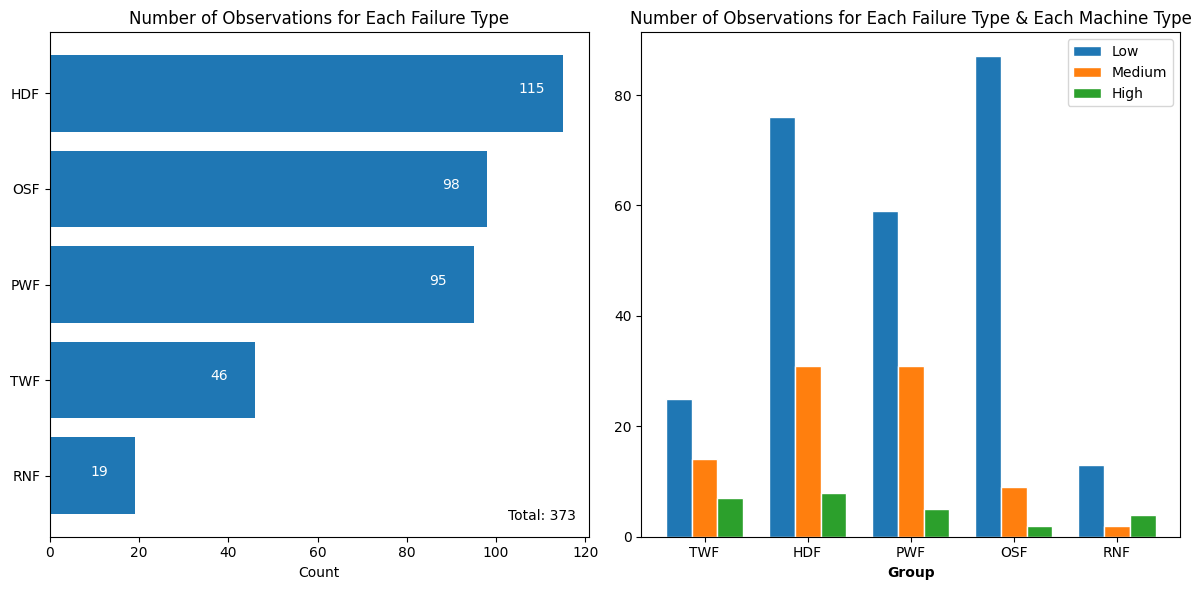

In [22]:
# Bar plot for low, medium, high counts
types = ["L", "M", "H"]
ftypes = ["TWF", "HDF", "PWF", "OSF", "RNF"]

low = []
medium = []
high = []

for t in types:
    for f in ftypes:
        count = df[(df["type"] == t) & (df[f] == 1)][f].count()
        if t == "L":
            low.append(count)
        elif t == "M":
            medium.append(count)
        elif t == "H":
            high.append(count)

# Bar plot for total counts
h = df[df["HDF"] == 1]["HDF"].count()
p = df[df["PWF"] == 1]["PWF"].count()
t = df[df["TWF"] == 1]["TWF"].count()
o = df[df["OSF"] == 1]["OSF"].count()
r = df[df["RNF"] == 1]["RNF"].count()

tfail = pd.DataFrame({
    'Group':  ['HDF', 'PWF', 'TWF', 'OSF', 'RNF'],
    'Value': [h, p, t, o, r]
})

tfail = tfail.sort_values(by=['Value'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First graph - Number of Observations for Each Group
axes[0].barh(y=tfail.Group, width=tfail.Value)
for i, v in enumerate(tfail.Value):
    axes[0].text(v - 10, i, str(v), color='white')
total = tfail.Value.sum()
axes[0].text(118, -0.5, f"Total: {total}", ha='right', va='bottom', color='black')
axes[0].set_title('Number of Observations for Each Failure Type')
axes[0].set_xlabel('Count')

# Second graph - Count of Each Group by Type
barWidth = 0.25
r1 = np.arange(len(low))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
axes[1].bar(r1, low, width=barWidth, edgecolor='white', label='Low')
axes[1].bar(r2, medium, width=barWidth, edgecolor='white', label='Medium')
axes[1].bar(r3, high, width=barWidth, edgecolor='white', label='High')
axes[1].set_xlabel('Group', fontweight='bold')
axes[1].set_xticks([r + barWidth for r in range(len(low))])
axes[1].set_xticklabels(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
axes[1].set_title('Number of Observations for Each Failure Type & Each Machine Type')
axes[1].legend()

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

***

The most frequently occurring damage is heat dissipation or overheating. This damage occurs when the temperature increases up to or at a reasonable limit. Therefore, the company must ensure that the machine room temperature remains cold to minimize the occurrence of overheating. Interestingly, when viewed based on their type, the most prominent thing is that many L-type engines suffer overstrain damage. So, it is necessary to maintain pressure stability for this type to remain normal so that overstrain damage can be minimized. Another point that is needed is the possibility that the machine has experienced more than one type of damage, characterized by the presence of inconsistencies between the total on the bar chart and the previous pie chart.


***

In [23]:
from itertools import chain
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)

def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
    xy = [
        (x1, y1),
        (x2, y2),
        (x3, y3),
    ]
    polygon = patches.Polygon(
        xy=xy,
        closed=True,
        color=fillcolor)
    ax.add_patch(polygon)

def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

In [24]:
def venn5(labels, names=['A', 'B', 'C', 'D', 'E'], **options):
    """
    plots a 5-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('00001', '00010', '00100', ...),
              hence a valid set could look like: {'00001': 'text 1', '00010': 'text 2', '00100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(5)])
    figsize = (10,10)
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.428, 0.449, 0.87, 0.50, 155.0, colors[0])
    draw_ellipse(fig, ax, 0.469, 0.543, 0.87, 0.50, 82.0, colors[1])
    draw_ellipse(fig, ax, 0.558, 0.523, 0.87, 0.50, 10.0, colors[2])
    draw_ellipse(fig, ax, 0.578, 0.432, 0.87, 0.50, 118.0, colors[3])
    draw_ellipse(fig, ax, 0.489, 0.383, 0.87, 0.50, 46.0, colors[4])
    draw_text(fig, ax, 0.27, 0.11, labels.get('00001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.72, 0.11, labels.get('00010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.55, 0.13, labels.get('00011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.91, 0.58, labels.get('00100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.78, 0.64, labels.get('00101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.84, 0.41, labels.get('00110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.76, 0.55, labels.get('00111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.90, labels.get('01000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.15, labels.get('01001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.42, 0.78, labels.get('01010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.15, labels.get('01011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.67, 0.76, labels.get('01100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.70, 0.71, labels.get('01101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.74, labels.get('01110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.64, 0.67, labels.get('01111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.10, 0.61, labels.get('10000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.20, 0.31, labels.get('10001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.76, 0.25, labels.get('10010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.23, labels.get('10011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.18, 0.50, labels.get('10100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.21, 0.37, labels.get('10101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.81, 0.37, labels.get('10110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.74, 0.40, labels.get('10111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.27, 0.70, labels.get('11000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.34, 0.25, labels.get('11001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.33, 0.72, labels.get('11010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.22, labels.get('11011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.25, 0.58, labels.get('11100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.28, 0.39, labels.get('11101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.36, 0.66, labels.get('11110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.51, 0.47, labels.get('11111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.02, 0.72, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.72, 0.94, names[1], colors[1], fontsize=fontsize, va="bottom")
    draw_text(fig, ax, 0.97, 0.74, names[2], colors[2], fontsize=fontsize, ha="left")
    draw_text(fig, ax, 0.88, 0.05, names[3], colors[3], fontsize=fontsize, ha="left")
    draw_text(fig, ax, 0.12, 0.05, names[4], colors[4], fontsize=fontsize, ha="right")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax

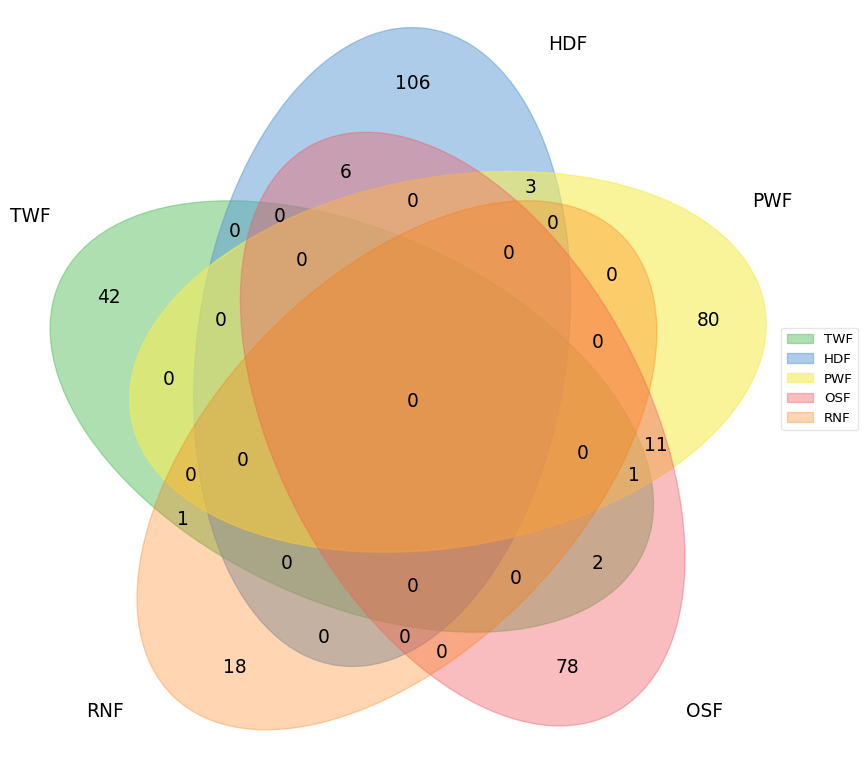

In [25]:
fail = df[df['machine_failure'] == 1][df.columns[-5:]]
fail_type = list(df.columns[-5:])

# Convert the DataFrame into a list of sets
sets = [set(fail[col].index[fail[col] == 1]) for col in fail.columns]

# Create the labels for the sets
labels = get_labels(sets, fill=['number'])

# Plot the Venn diagram
fig, ax = venn5(labels, names=fail_type)

# Show the plot
plt.show()

***

Apparently, no machine has suffered more than three types of damage at the same time. In fact, there is only 1 sample of machines that has experienced 3 kinds of damage simultaneously. Those machine have experienced damage types TWF, PWF and OSF at once.

***

***

And for the columns of process_temperature_k and air_temperature_k, will convert those units from Kelvin to Celsius since people are more familiar with this unit

***

In [26]:
df['process_temperature_c'] = (df['process_temperature_k'] - 273.15).round(2)
df = df.drop('process_temperature_k',axis=1)

df['air_temperature_c'] = (df['air_temperature_k'] - 273.15).round(2)
df = df.drop('air_temperature_k',axis=1)
df.head()

,type,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF,process_temperature_c,air_temperature_c
0,M,1551,42.8,0,0,0,0,0,0,0,35.45,24.95
1,L,1408,46.3,3,0,0,0,0,0,0,35.55,25.05
2,L,1498,49.4,5,0,0,0,0,0,0,35.35,24.95
3,L,1433,39.5,7,0,0,0,0,0,0,35.45,25.05
4,L,1408,40.0,9,0,0,0,0,0,0,35.55,25.05


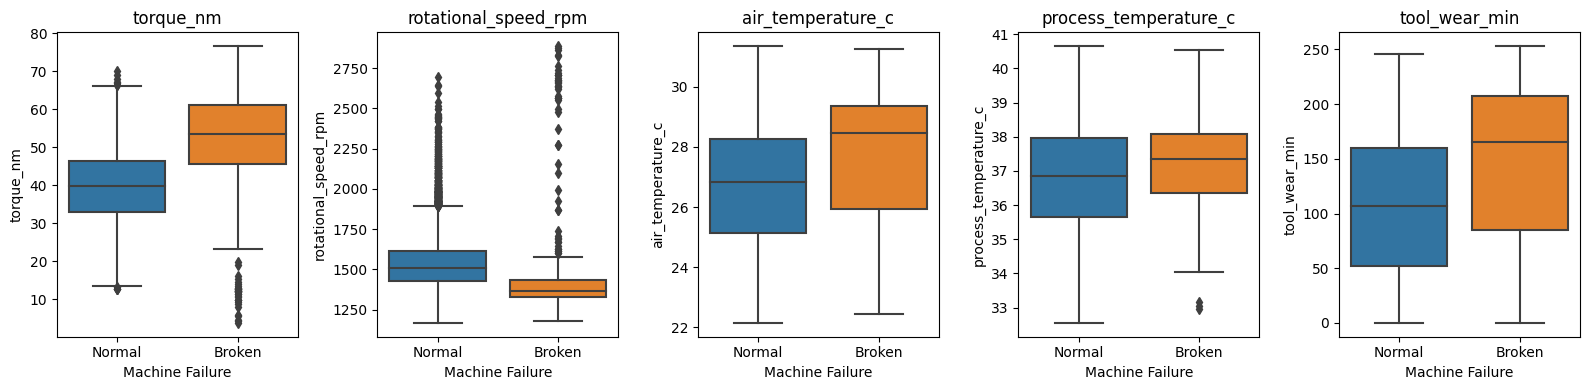

In [27]:
variables = ['torque_nm', 'rotational_speed_rpm', 'air_temperature_c', 'process_temperature_c', 'tool_wear_min']

fig, axes = plt.subplots(1, 5, figsize=(16, 4))

for i, variable in enumerate(variables):
    sns.boxplot(x='machine_failure', y=variable, data=df, ax=axes[i])
    axes[i].set_xlabel("Machine Failure")
    axes[i].set_ylabel(variable)
    axes[i].set_xticklabels(['Normal', 'Broken'])
    axes[i].set_title(variable)

plt.tight_layout()
plt.show()

***

keep torque 30-45 Nm, keep rpm 1400-1600 & keep temperature 25-28 degree celcius

***

<ipython-input-28-5a153fe97b29>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'rotational_speed_rpm'),
  Text(0, 1.5, 'torque_nm'),
  Text(0, 2.5, 'tool_wear_min'),
  Text(0, 3.5, 'machine_failure'),
  Text(0, 4.5, 'process_temperature_c'),
  Text(0, 5.5, 'air_temperature_c')])

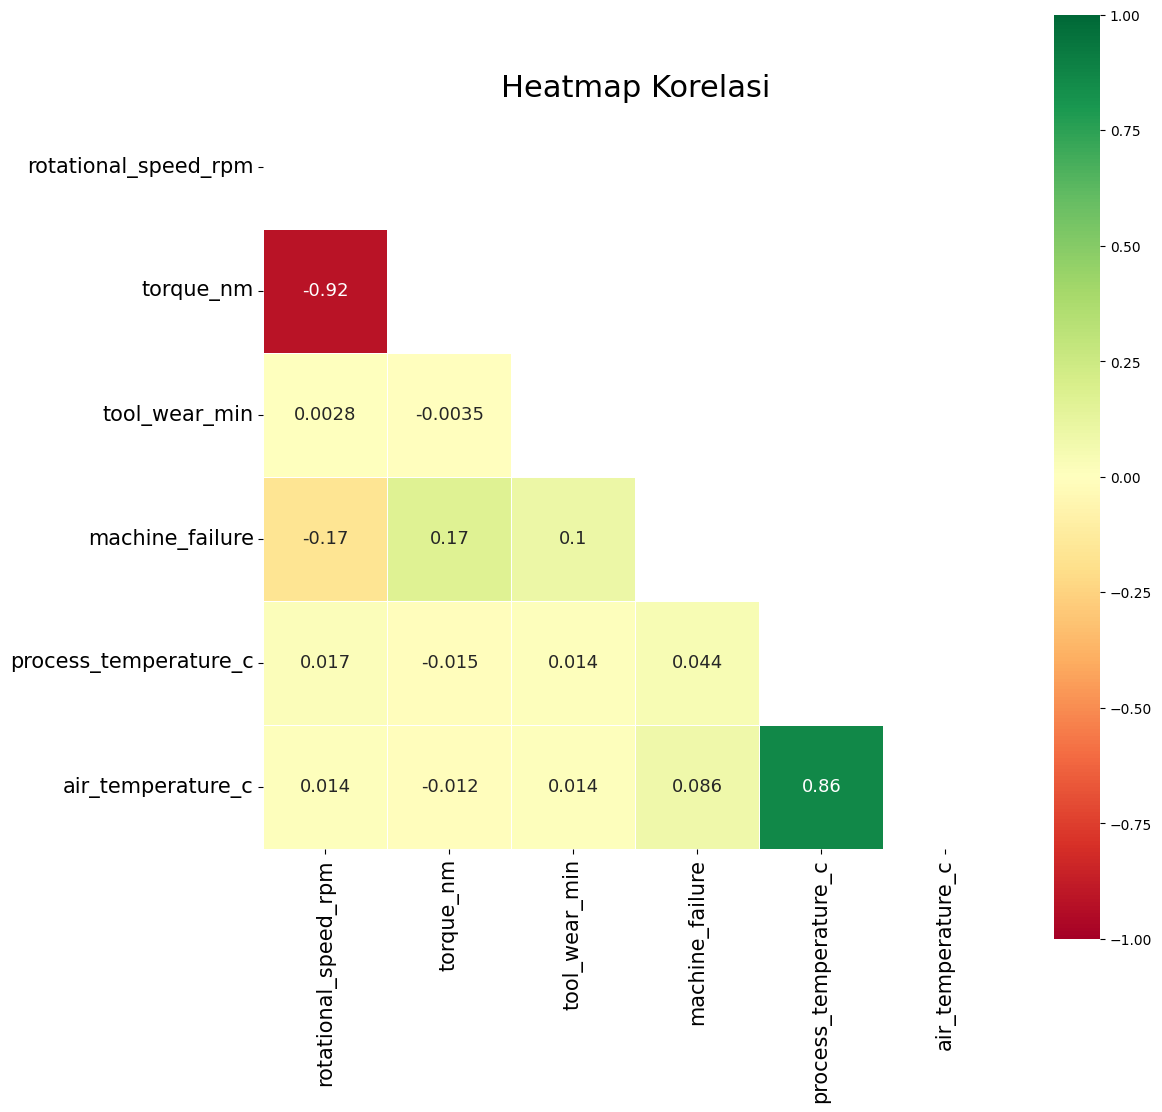

In [28]:
# Heatmap Korelasi
num_df = df.drop(["type", "TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)
corr = num_df.corr('spearman')

# Membuat mask untuk segitiga atas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Menyiapkan figure matplotlib
f, ax = plt.subplots(figsize=(12, 12))

# Membuat colormap diverging kustom
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Menggambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr, mask=mask, cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot=True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Korelasi', fontsize=22)
plt.yticks(fontsize=15)

***

totque & rpm is a highest negative cirrelation, in other hand process & air temperature is highest positive correlation

***

###**3.3. Feature Engineering**

***

Considering there is a column that contains ordinal data, label encoding should be performed to convert it into numeric form so that machine learning algorithms can understand the data.

***

In [29]:
map = {'L' : 0, 'M' : 1, 'H' : 2}
df['type'] = df['type'].replace(map)
df.head()

,type,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF,process_temperature_c,air_temperature_c
0,1,1551,42.8,0,0,0,0,0,0,0,35.45,24.95
1,0,1408,46.3,3,0,0,0,0,0,0,35.55,25.05
2,0,1498,49.4,5,0,0,0,0,0,0,35.35,24.95
3,0,1433,39.5,7,0,0,0,0,0,0,35.45,25.05
4,0,1408,40.0,9,0,0,0,0,0,0,35.55,25.05


In [30]:
df = df[['type', 'process_temperature_c', 'air_temperature_c',
         'rotational_speed_rpm', 'torque_nm', 'tool_wear_min',
         'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
df.head()

,type,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,35.45,24.95,1551,42.8,0,0,0,0,0,0,0
1,0,35.55,25.05,1408,46.3,3,0,0,0,0,0,0
2,0,35.35,24.95,1498,49.4,5,0,0,0,0,0,0
3,0,35.45,25.05,1433,39.5,7,0,0,0,0,0,0
4,0,35.55,25.05,1408,40.0,9,0,0,0,0,0,0


###**3.4. Patern Each Failure Type**

In [31]:
# Daftar array yang akan di-scale
ptemp = list(df['process_temperature_c'])
atemp = list(df['air_temperature_c'])
rpm = list(df['rotational_speed_rpm'])
tor = list(df['torque_nm'])
twear = list(df['tool_wear_min'])

# Fungsi untuk melakukan scaling pada array
def scale_array(arr, new_min=0, new_max=5):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    scaled_arr = ((arr - arr_min) / (arr_max - arr_min)) * (new_max - new_min) + new_min
    return scaled_arr

# Menyimpan daftar array yang akan di-scale
arrays = [ptemp, atemp, rpm, tor, twear]

# Melakukan scaling pada setiap array dan menggantinya dengan nilai yang di-scale
for i in range(len(arrays)):
    scaled_array = scale_array(arrays[i], new_min=0, new_max=5)
    arrays[i] = scaled_array

# Mendapatkan array yang telah di-scale
ptemp_scaled = arrays[0]
atemp_scaled = arrays[1]
rpm_scaled = arrays[2]
tor_scaled = arrays[3]
twear_scaled = arrays[4]

# Membuat salinan DataFrame
df_new = df.copy()

# Menggantikan nilai dalam kolom-kolom terkait dengan nilai yang telah di-scale
df_new['process_temperature_c'] = ptemp_scaled
df_new['air_temperature_c'] = atemp_scaled
df_new['rotational_speed_rpm'] = rpm_scaled
df_new['torque_nm'] = tor_scaled
df_new['tool_wear_min'] = twear_scaled

# Menampilkan hasil DataFrame baru
df_new.head()

,type,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,1.790123,1.521739,1.114668,2.678571,0.000000,0,0,0,0,0,0
1,0,1.851852,1.576087,0.698487,2.918956,0.059289,0,0,0,0,0,0
2,0,1.728395,1.521739,0.960419,3.131868,0.098814,0,0,0,0,0,0
3,0,1.790123,1.576087,0.771246,2.451923,0.138340,0,0,0,0,0,0
4,0,1.851852,1.576087,0.698487,2.486264,0.177866,0,0,0,0,0,0


In [32]:
# Menghitung rata-rata nilai atribut numerik untuk setiap jenis kerusakan
twf = df_new[df_new['TWF'] == 1]
avg_twf = twf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_twf = np.round(avg_twf, 2)

hdf = df_new[df_new['HDF'] == 1]
avg_hdf = hdf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_hdf = np.round(avg_hdf, 2)

pwf = df_new[df_new['PWF'] == 1]
avg_pwf = pwf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_pwf = np.round(avg_pwf, 2)

osf = df_new[df_new['OSF'] == 1]
avg_osf = osf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_osf = np.round(avg_osf, 2)

rnf = df_new[df_new['RNF'] == 1]
avg_rnf = rnf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_rnf = np.round(avg_rnf, 2)

normal = df_new[df_new['machine_failure'] == 0]
avg_normal = normal[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_normal = np.round(avg_normal, 2)

fail = df_new[df_new['machine_failure'] == 1]
avg_fail = fail[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_fail = np.round(avg_fail, 2)

#### **3.4.1. Normal VS Fail**

In [33]:
import plotly.express as px
import plotly.graph_objects as go

# Definisikan kategori fitur numerik
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Buat objek figure
fig = go.Figure()

# Tambahkan plot polar untuk mesin normal
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Tambahkan plot polar untuk kegagalan mesin secara umum
fig.add_trace(go.Scatterpolar(
      r=avg_fail,
      theta=categories,
      fill='toself',
      name='General Machine Failure'
))

# Konfigurasi tata letak dan tampilan plot polar
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

# Tampilkan plot
fig.show()

***

A broken machine tends to have a slower rotation per minute compared to a normal machine, although the difference may not be significant. On the other hand, the air temperature, process temperature, torque, and tool wear exceed the average when the machine is in a normal condition.

***

#### **3.4.2. Normal VS Tool Wear Failure**

In [34]:
# Menentukan daftar kategori fitur
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek Figure dari plotly
fig = go.Figure()

# Menambahkan trace untuk mesin normal ke plot polar
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace untuk kegagalan akibat keausan alat ke plot polar
fig.add_trace(go.Scatterpolar(
      r=avg_twf,
      theta=categories,
      fill='toself',
      name='Tool Wear Failure'
))

# Mengupdate layout plot polar
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

# Menampilkan plot polar
fig.show()


***

Tool wear failure is a type of machine damage that occurs when a machine is used continuously for an extended period of time, exceeding the normal operating duration. Over time, the constant use and friction cause the cutting tool or machine component to deteriorate and wear out

***

#### **3.4.3. Normal VS Heat Dissipation Failure**

In [35]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Heat Dissipation Failure
fig.add_trace(go.Scatterpolar(
      r=avg_hdf,
      theta=categories,
      fill='toself',
      name='Heat Dissipation Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()


***

Heat Dissipation Failure is a type of machine damage that occurs when the temperature of the machine and the surrounding air exceeds the recommended limits. This is often accompanied by increased torque and slower rotation.

***

#### **3.4.4. Normal VS Power Failure**

In [36]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Power Failure
fig.add_trace(go.Scatterpolar(
      r=avg_pwf,
      theta=categories,
      fill='toself',
      name='Power Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

Power Failure is a type of machine damage that occurs when the machine is subjected to excessive torque or load, resulting in a slower rotation speed.

***

#### **3.4.5. Normal VS Overstrain Failure**

In [37]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Overstrain Failure
fig.add_trace(go.Scatterpolar(
      r=avg_osf,
      theta=categories,
      fill='toself',
      name='Overstrain Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

When a machine is continuously operated for an extended period of time beyond its recommended limits, accompanied by increased torque and slower rotation, the machine is prone to experience Overstrain Failure. Overstrain Failure occurs when the machine is subjected to excessive stress, load, or strain, exceeding its designed capacity.

***

#### **3.4.6. Normal VS Random Failure**

In [38]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Random
fig.add_trace(go.Scatterpolar(
      r=avg_rnf,
      theta=categories,
      fill='toself',
      name='Random'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

In random failure, there is no significant difference in terms of rotation, torque, air temperature, machine temperature, and duration of machine usage compared to a normal machine. However, the rotation of the machine tends to be slower, while the torque, air temperature, machine temperature, and duration of machine usage have higher values compared to a normal machine.

***

In [39]:
import plotly.express as px
import plotly.graph_objects as go

# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori General Machine Failure
fig.add_trace(go.Scatterpolar(
      r=avg_fail,
      theta=categories,
      fill='toself',
      name='General Machine Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Tool Wear Failure
fig.add_trace(go.Scatterpolar(
      r=avg_twf,
      theta=categories,
      fill='toself',
      name='Tool Wear Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Heat Dissipation Failure
fig.add_trace(go.Scatterpolar(
      r=avg_hdf,
      theta=categories,
      fill='toself',
      name='Heat Dissipation Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Power Failure
fig.add_trace(go.Scatterpolar(
      r=avg_pwf,
      theta=categories,
      fill='toself',
      name='Power Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Overstrain Failure
fig.add_trace(go.Scatterpolar(
      r=avg_osf,
      theta=categories,
      fill='toself',
      name='Overstrain Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Random
fig.add_trace(go.Scatterpolar(
      r=avg_rnf,
      theta=categories,
      fill='toself',
      name='Random'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

##**4. Modelling & Evaluation**

###**4.1. Splitting X and y**

***

since the goal is predict machine if it still normal or failure, dependent variable should be 'machine_failure'

***

In [40]:
X = df.drop(['machine_failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'], axis=1)

y = df.machine_failure

###**4.2. Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(7992, 6)

In [43]:
X_test.shape

(1999, 6)

###**4.2. Handling Inbalance with SMOTE**

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy=0.8, random_state=50)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Checking target proportion
print("Total rows in new dataset: ", len(X_resampled))
print(y_resampled.value_counts())

Total rows in new dataset:  13901
0    7723
1    6178
Name: machine_failure, dtype: int64


###**4.3. Model Building**

In [46]:
from pycaret.classification import *

In [47]:
train_df = pd.concat([X_resampled, y_resampled], axis=1)
exp_name = setup(data=train_df,  target='machine_failure', session_id=308, fold=5)

,Description,Value
0,Session id,308
1,Target,machine_failure
2,Target type,Binary
3,Original data shape,"(13901, 7)"
4,Transformed data shape,"(13901, 7)"
5,Transformed train set shape,"(9730, 7)"
6,Transformed test set shape,"(4171, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [48]:
compare_models(round=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.98,1.00,0.98,0.97,0.97,0.95,0.95,0.49
et,Extra Trees Classifier,0.97,1.00,0.98,0.96,0.97,0.94,0.94,0.56
lightgbm,Light Gradient Boosting Machine,0.97,1.00,0.97,0.96,0.97,0.94,0.94,0.56
rf,Random Forest Classifier,0.96,0.99,0.97,0.95,0.96,0.93,0.93,0.81
dt,Decision Tree Classifier,0.95,0.95,0.95,0.93,0.94,0.89,0.89,0.07
gbc,Gradient Boosting Classifier,0.94,0.98,0.94,0.92,0.93,0.88,0.88,0.93
knn,K Neighbors Classifier,0.92,0.97,0.96,0.87,0.91,0.84,0.84,0.10
ada,Ada Boost Classifier,0.91,0.97,0.91,0.89,0.90,0.82,0.82,0.50
qda,Quadratic Discriminant Analysis,0.86,0.93,0.82,0.86,0.84,0.72,0.72,0.05
lr,Logistic Regression,0.83,0.91,0.80,0.81,0.81,0.65,0.66,0.71


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [49]:
compare = pull()
compare

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.98,1.00,0.98,0.97,0.97,0.95,0.95,0.49
et,Extra Trees Classifier,0.97,1.00,0.98,0.96,0.97,0.94,0.94,0.56
lightgbm,Light Gradient Boosting Machine,0.97,1.00,0.97,0.96,0.97,0.94,0.94,0.56
rf,Random Forest Classifier,0.96,0.99,0.97,0.95,0.96,0.93,0.93,0.81
dt,Decision Tree Classifier,0.95,0.95,0.95,0.93,0.94,0.89,0.89,0.07
gbc,Gradient Boosting Classifier,0.94,0.98,0.94,0.92,0.93,0.88,0.88,0.93
knn,K Neighbors Classifier,0.92,0.97,0.96,0.87,0.91,0.84,0.84,0.10
ada,Ada Boost Classifier,0.91,0.97,0.91,0.89,0.90,0.82,0.82,0.50
qda,Quadratic Discriminant Analysis,0.86,0.93,0.82,0.86,0.84,0.72,0.72,0.05
lr,Logistic Regression,0.83,0.91,0.80,0.81,0.81,0.65,0.66,0.71


***

**XGBoost choosen between all model** because f1-score is higher than other. F1-score is a balanced metric that considers both precision and recall. It is the harmonic mean of precision and recall, providing a single value that balances the trade-off between precision and recall. F1-score is particularly useful when there is an imbalance between the positive and negative classes or when both precision and recall are important.

If the cost or consequences of missing a machine failure are high, such as safety hazards or significant financial losses, then a high recall is crucial. Recall focuses on minimizing false negatives, ensuring that the model captures as many actual machine failures as possible. In this case, it is important to prioritize identifying all the true positives, even if it results in a higher rate of false positives.

On the other hand, if the cost or impact of false positives is high, such as unnecessary maintenance or resource allocation, then precision becomes more important. Precision focuses on minimizing false positives, ensuring that the predicted machine failures are accurate and reliable. In this case, it is important to prioritize the accuracy of positive predictions, even if it means potentially missing some true failures.

Ultimately, the choice between recall and precision should align with the specific goals and requirements of the machine failure prediction problem. It is often a trade-off between identifying all failures (recall) and minimizing false alarms (precision). A balance between the two can be achieved by considering metrics such as the F1-score, which provides a harmonic mean of recall and precision and can be useful in situations where both metrics need to be considered simultaneously.

***

###**4.4. Create Best Model**

In [51]:
xgb = create_model('xgboost', fold=5, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.98,1.00,0.98,0.97,0.97,0.95,0.95
1,0.97,1.00,0.98,0.96,0.97,0.95,0.95
2,0.97,1.00,0.98,0.96,0.97,0.95,0.95
3,0.97,1.00,0.98,0.96,0.97,0.95,0.95
4,0.98,1.00,0.98,0.98,0.98,0.96,0.96
Mean,0.98,1.00,0.98,0.97,0.97,0.95,0.95
Std,0.00,0.00,0.00,0.01,0.00,0.01,0.01


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

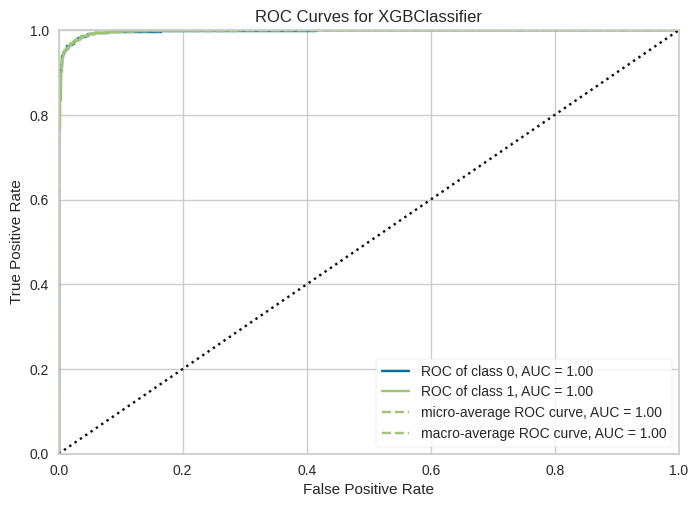

In [52]:
plot_model(xgb, plot = 'auc')

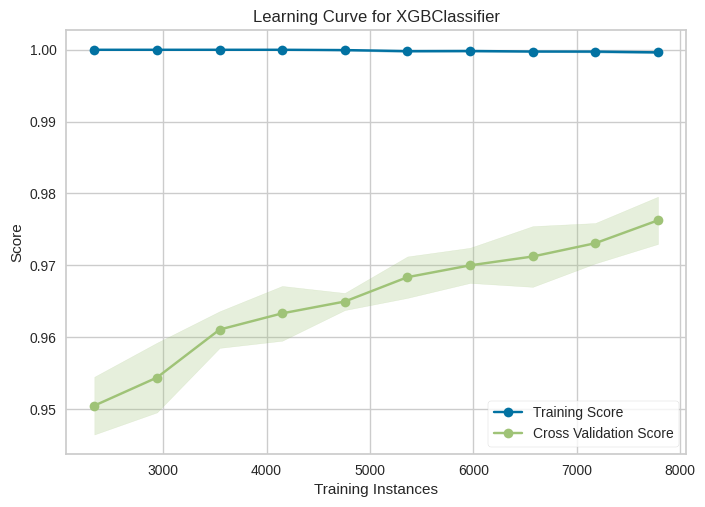

In [53]:
plot_model(xgb, plot = 'learning')

###**5.5. Test Performance**

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
predictions = xgb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1920
           1       0.58      0.77      0.66        79

    accuracy                           0.97      1999
   macro avg       0.78      0.87      0.82      1999
weighted avg       0.97      0.97      0.97      1999



In [62]:
print(confusion_matrix(y_test, predictions))

[[1875   45]
 [  18   61]]


###**5.6. Feature Importance**

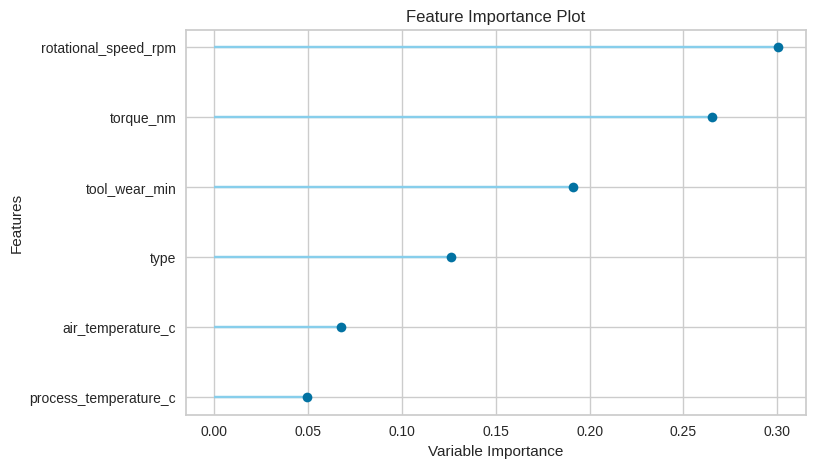

In [63]:
plot_model(xgb, plot = 'feature')

#**Multilabel Classification**

##**1. Business Understanding**

Problem:
mengembangkan model klasifikasi multilabel untuk mengategorikan jenis kegagalan mesin berdasarkan pembacaan sensor dan parameter operasional yang beragam. Dengan mengklasifikasikan jenis kegagalan mesin secara akurat, memungkinkan maintenance yang lebih terarah dan meminimalkan downtime mesin, sehingga meningkatkan efisiensi operasional dan penghematan biaya.

Metrik:
1. Akurasi: Mengukur akurasi keseluruhan model dalam memprediksi dengan benar jenis kegagalan mesin.
2. Presisi: Mengevaluasi presisi dari setiap kategori kegagalan, yang mengindikasikan proporsi instansi positif yang diprediksi dengan benar dari semua instansi yang diprediksi positif untuk jenis kegagalan tertentu.
3. Recall: Menilai recall dari setiap kategori kegagalan, yang mewakili proporsi instansi positif yang diprediksi dengan benar dari semua instansi positif aktual untuk jenis kegagalan tertentu.
4. Skor F1: Menghitung rata-rata harmonik dari presisi dan recall untuk menyeimbangkan antara presisi dan recall untuk setiap kategori kegagalan.
5. Hamming Loss: Mengukur fraksi label yang salah diklasifikasikan untuk mengevaluasi kinerja klasifikasi multilabel secara keseluruhan.

Tujuan:
Tujuan dari klasifikasi multilabel untuk jenis kegagalan mesin adalah mencapai tingkat akurasi yang tinggi dalam mengidentifikasi berbagai jenis kegagalan. Dengan memprediksi kategori kegagalan mesin secara akurat, model bertujuan membantu tim pemeliharaan dalam mendiagnosis dan menyelesaikan masalah tertentu dengan cepat, sehingga mengurangi waktu henti mesin, meningkatkan produktivitas, dan meningkatkan efektivitas keseluruhan peralatan (OEE). Selain itu, model dapat membantu alokasi sumber daya secara efektif dengan memprioritaskan upaya pemeliharaan berdasarkan jenis kegagalan yang berbeda.

##**3. Data Preprocessing**

###**3.1 Data Cleaning**

In [64]:
#Define X dan Y
X = df.drop(['machine_failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'], axis=1)
y = df[["TWF", "HDF", "PWF", "OSF", "RNF"]]

In [65]:
#Drop sum y = 0
df_fail = df.copy()
df_fail['row_sum'] = y.sum(axis=1)
df_fail = df_fail[df_fail['row_sum']>0].drop('row_sum',axis=1)

df_fail.head()

,type,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
50,0,35.95,25.75,2861,4.6,143,1,0,0,1,0,0
69,0,35.85,25.75,1410,65.7,191,1,0,0,1,1,0
77,0,35.75,25.65,1455,41.3,208,1,1,0,0,0,0
160,0,35.05,25.25,1282,60.7,216,1,0,0,0,1,0
161,0,34.95,25.15,1412,52.3,218,1,0,0,0,1,0


In [66]:
df_fail.shape

(348, 12)

## 4.Modelling

### **4.1. Define Dataset and Cek Imbalance**

In [70]:
df_fail.head()

,type,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
50,0,35.95,25.75,2861,4.6,143,1,0,0,1,0,0
69,0,35.85,25.75,1410,65.7,191,1,0,0,1,1,0
77,0,35.75,25.65,1455,41.3,208,1,1,0,0,0,0
160,0,35.05,25.25,1282,60.7,216,1,0,0,0,1,0
161,0,34.95,25.15,1412,52.3,218,1,0,0,0,1,0


In [71]:
#Define X dan Y
X = df_fail.drop(['machine_failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'], axis=1)
y = df_fail[["TWF", "HDF", "PWF", "OSF", "RNF"]]

In [72]:
print(X.shape)
print(y.shape)

(348, 6)
(348, 5)


In [73]:
#Cek value kategori setiap jenis machine failure
print(y['TWF'].value_counts())
print(y['HDF'].value_counts())
print(y['PWF'].value_counts())
print(y['OSF'].value_counts())
print(y['RNF'].value_counts())

0    302
1     46
Name: TWF, dtype: int64
0    233
1    115
Name: HDF, dtype: int64
0    253
1     95
Name: PWF, dtype: int64
0    250
1     98
Name: OSF, dtype: int64
0    329
1     19
Name: RNF, dtype: int64


Label imbalance, maka dilakukan handling imbalance

### **4.2 SMOTE**

#### **4.2.1 MLSMOTE V1**

source :

https://github.com/niteshsukhwani/MLSMOTE

https://medium.com/thecyphy/handling-data-imbalance-in-multi-label-classification-mlsmote-531155416b87

In [ ]:
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe

    args
    df: pandas.DataFrame, target label df whose tail label has to identified

    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified

  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels

    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe

    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance

    args
    X: np.array, array whose nearest neighbor has to find

    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=10,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm

    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample

    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [ ]:
X_sub, y_sub = get_minority_instace(X, y)   #Getting minority instance of that datframe
X_res,y_res =MLSMOTE(X_sub, y_sub, 500)                #Applying MLSMOTE to augment the dataframe

In [ ]:
print(y_res['TWF'].value_counts())
print(y_res['HDF'].value_counts())
print(y_res['PWF'].value_counts())
print(y_res['OSF'].value_counts())
print(y_res['RNF'].value_counts())

0.0    542
1.0      2
Name: TWF, dtype: int64
0.0    544
Name: HDF, dtype: int64
1.0    488
0.0     56
Name: PWF, dtype: int64
0.0    459
1.0     85
Name: OSF, dtype: int64
1.0    339
0.0    205
Name: RNF, dtype: int64


In [ ]:
print(y['TWF'].value_counts())
print(y['HDF'].value_counts())
print(y['PWF'].value_counts())
print(y['OSF'].value_counts())
print(y['RNF'].value_counts())

0    228
1     42
Name: TWF, dtype: int64
0    160
1    110
Name: HDF, dtype: int64
0    245
1     25
Name: PWF, dtype: int64
0    182
1     88
Name: OSF, dtype: int64
0    251
1     19
Name: RNF, dtype: int64


#### **4.2.2 MLSMOTE V2**

source :

https://www.kaggle.com/code/tolgadincer/upsampling-multilabel-data-with-mlsmote/notebook

In [ ]:
def get_tail_label(df: pd.DataFrame, ql=[0.05, 1.]) -> list:
    """
    Find the underrepresented targets.
    Underrepresented targets are those which are observed less than the median occurance.
    Targets beyond a quantile limit are filtered.
    """
    irlbl = df.sum(axis=0)
    irlbl = irlbl[(irlbl > irlbl.quantile(ql[0])) & ((irlbl < irlbl.quantile(ql[1])))]  # Filtering
    irlbl = irlbl.max() / irlbl
    threshold_irlbl = irlbl.median()
    tail_label = irlbl[irlbl > threshold_irlbl].index.tolist()
    return tail_label

def get_minority_samples(X: pd.DataFrame, y: pd.DataFrame, ql=[0.05, 1.]):
    """
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    tail_labels = get_tail_label(y, ql=ql)
    index = y[y[tail_labels].apply(lambda x: (x == 1).any(), axis=1)].index.tolist()

    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X: pd.DataFrame, neigh) -> list:
    """
    Give index of 10 nearest neighbor of all the instance

    args
    X: np.array, array whose nearest neighbor has to find

    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs = NearestNeighbors(n_neighbors=neigh, metric='euclidean', algorithm='kd_tree').fit(X)
    euclidean, indices = nbs.kneighbors(X)
    return indices

def MLSMOTE(X, y, n_sample, neigh=5):
    """
    Give the augmented data using MLSMOTE algorithm

    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample

    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X, neigh=5)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0, n-1)
        neighbor = random.choice(indices2[reference, 1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val > 0 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbor,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    return new_X, target

In [ ]:
X_sub_b, y_sub_b = get_minority_samples(X, y)  # Getting minority samples of that datframe
X_res_b, y_res_b = MLSMOTE(X_sub_b, y_sub_b, 500, 5)  # Applying MLSMOTE to augment the dataframe

In [ ]:
print(y_res_b['TWF'].value_counts())
print(y_res_b['HDF'].value_counts())
print(y_res_b['PWF'].value_counts())
print(y_res_b['OSF'].value_counts())
print(y_res_b['RNF'].value_counts())

0.0    434
1.0     66
Name: TWF, dtype: int64
0.0    500
Name: HDF, dtype: int64
1.0    500
Name: PWF, dtype: int64
0.0    349
1.0    151
Name: OSF, dtype: int64
0.0    500
Name: RNF, dtype: int64


***

dari kedua algoritma yang diterapkan, memiliki 2 isu yang sama yaitu ada ketidak seimbangan yang sangat ektrem di salah satu label. label HDF pada kedua algoritma tersebut hanya berisikan nilai negatif dan tidak ada satupun yang bernilai positif. jadi, untuk sementara, dilakukan modeling tanpa resample. jika akurasi model yang muncul dirasa cukup bagus, yang artinya model bisa menangkap patern tiap jenis kerusakan dengan baik, maka resample tidak harus dilakukan dan bisa lanjut ke tahapan selanjutnya.

***

### **4.3 Model Fitting**

In [74]:
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.multioutput import MultiOutputClassifier
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from collections import Counter
from scipy.stats import randint

#### **4.3.1 Splitting**

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((278, 6), (278, 5), (70, 6), (70, 5))

#### **4.3.2 Decision Tree**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [76]:
#Decision Tree
dt = tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

from sklearn import metrics
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_dt),2))

DecisionTrees's Accuracy:  0.81


In [77]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.87      0.83      0.85        24
           2       0.94      0.81      0.87        21
           3       0.95      0.95      0.95        21
           4       0.33      0.50      0.40         2

   micro avg       0.88      0.84      0.86        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.89      0.84      0.86        76
 samples avg       0.89      0.86      0.87        76



#### **4.3.3 Extra Tree Classifier**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()

etc.fit(X_train,y_train)
y_pred_etc = etc.predict(X_test)


print("Extra Tree Classifier's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_etc),2))

Extra Tree Classifier's Accuracy:  0.87


In [79]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.92      0.96        24
           2       1.00      0.86      0.92        21
           3       1.00      1.00      1.00        21
           4       0.00      0.00      0.00         2

   micro avg       0.99      0.88      0.93        76
   macro avg       0.77      0.70      0.74        76
weighted avg       0.96      0.88      0.92        76
 samples avg       0.94      0.91      0.92        76



#### **4.3.4 Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_rf),2))

Random Forest's Accuracy:  0.84


In [81]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.88      0.93        24
           2       0.95      0.86      0.90        21
           3       0.91      1.00      0.95        21
           4       0.00      0.00      0.00         2

   micro avg       0.94      0.87      0.90        76
   macro avg       0.74      0.70      0.72        76
weighted avg       0.92      0.87      0.89        76
 samples avg       0.94      0.90      0.91        76



#### **4.3.5 KNeighbors Classifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("KNeighbors Classifier's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_knn), 2))

KNeighbors Classifier's Accuracy:  0.71


In [83]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.70      0.79      0.75        24
           2       0.93      0.62      0.74        21
           3       0.83      0.90      0.86        21
           4       0.00      0.00      0.00         2

   micro avg       0.78      0.76      0.77        76
   macro avg       0.63      0.64      0.63        76
weighted avg       0.78      0.76      0.76        76
 samples avg       0.79      0.79      0.78        76



#### **4.3.6 Ridge Classifier**


In [84]:
from sklearn.linear_model import RidgeClassifier
rgc = RidgeClassifier()

rgc.fit(X_train, y_train)
y_pred_rgc = rgc.predict(X_test)

print("Ridge Classifier's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_rgc), 2))

Ridge Classifier's Accuracy:  0.81


In [85]:
print(classification_report(y_test, y_pred_rgc))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.89      1.00      0.94        24
           2       1.00      0.95      0.98        21
           3       0.95      0.90      0.93        21
           4       0.00      0.00      0.00         2

   micro avg       0.94      0.87      0.90        76
   macro avg       0.77      0.65      0.68        76
weighted avg       0.92      0.87      0.88        76
 samples avg       0.86      0.87      0.86        76



#### **4.3.7 MLP Classifier**

In [86]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

mlpc.fit(X_train, y_train)
y_pred_mlpc = mlpc.predict(X_test)

print("MLP Classifier 's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_mlpc), 2))

MLP Classifier 's Accuracy:  0.49


In [87]:
print(classification_report(y_test, y_pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.54      0.58      0.56        24
           2       0.75      0.29      0.41        21
           3       0.84      1.00      0.91        21
           4       0.00      0.00      0.00         2

   micro avg       0.70      0.55      0.62        76
   macro avg       0.63      0.40      0.42        76
weighted avg       0.71      0.55      0.57        76
 samples avg       0.56      0.55      0.55        76



#### **4.3.8 Multioutput Classifier**

In [88]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

base_lr = LogisticRegression()
moc = MultiOutputClassifier(base_lr)

moc.fit(X_train, y_train)
y_pred_moc = moc.predict(X_test)

print("Multioutput Classifier's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_moc), 2))

Multioutput Classifier's Accuracy:  0.83


In [89]:
print(classification_report(y_test, y_pred_moc))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      0.92      0.90        24
           2       0.90      0.86      0.88        21
           3       1.00      0.95      0.98        21
           4       0.00      0.00      0.00         2

   micro avg       0.93      0.88      0.91        76
   macro avg       0.76      0.72      0.74        76
weighted avg       0.91      0.88      0.89        76
 samples avg       0.88      0.89      0.88        76



#### **4.3.9 Classifier Chain**

In [90]:
from sklearn.multioutput import ClassifierChain

cc = ClassifierChain(base_lr)

cc.fit(X_train, y_train)
y_pred_cc = cc.predict(X_test)

print("Classifier Chain's Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_cc), 2))

Classifier Chain's Accuracy:  0.87


In [91]:
print(classification_report(y_test, y_pred_cc))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      0.92      0.94        24
           2       0.95      0.90      0.93        21
           3       1.00      0.95      0.98        21
           4       0.00      0.00      0.00         2

   micro avg       0.97      0.89      0.93        76
   macro avg       0.78      0.73      0.75        76
weighted avg       0.95      0.89      0.92        76
 samples avg       0.91      0.90      0.90        76



## **5. Model Evaluation**

***

evaluasi model akan menggunakan nilai akurasi serta sejauh mana model bisa mengidentifikasi pola dari kelima jenis kerusakan yang ada. hal ini dilakukan untuk menyesuaikan objektif yang mendasari pembuatan model ini, dimana model diharapkan bisa memprediksi dengan tepat jenis-jenis kerusakan yang ada pada mesin yang rusak. tahap evaluasi dilakukan untuk memilih 1 model yang akan dijadikan sebagai final model.

***

### **5.1 Overall Score**

#### **5.1.1 Accuracy**

In [92]:
abc=[]
classifiers=['Decission Tree','Extra Tree','Random Forest','KNN','Ridge Classifier','MLP Classifier', 'Multioutput Classifier', 'Classifier Chain']
model_pred=[y_pred_dt, y_pred_etc, y_pred_rf, y_pred_knn, y_pred_rgc, y_pred_mlpc, y_pred_moc, y_pred_cc]
for i in model_pred :
    predict = i
    scores = round(metrics.accuracy_score(y_test, predict), 2)
    abc.append(scores)
models_dataframe=pd.DataFrame(abc,index=classifiers)
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Extra Tree,0.87
Classifier Chain,0.87
Random Forest,0.84
Multioutput Classifier,0.83
Decission Tree,0.81
Ridge Classifier,0.81
KNN,0.71
MLP Classifier,0.49


***

dari ke 8 model yang sudah ditraining dan ditesting, terlihat bahwa top 2 model dengan akurasi terbaik ada di Extra Tree dan Classifier Chain. sedangkan model terbawah ada pada MLP classifier

***

#### **5.1.2 Classification Report**

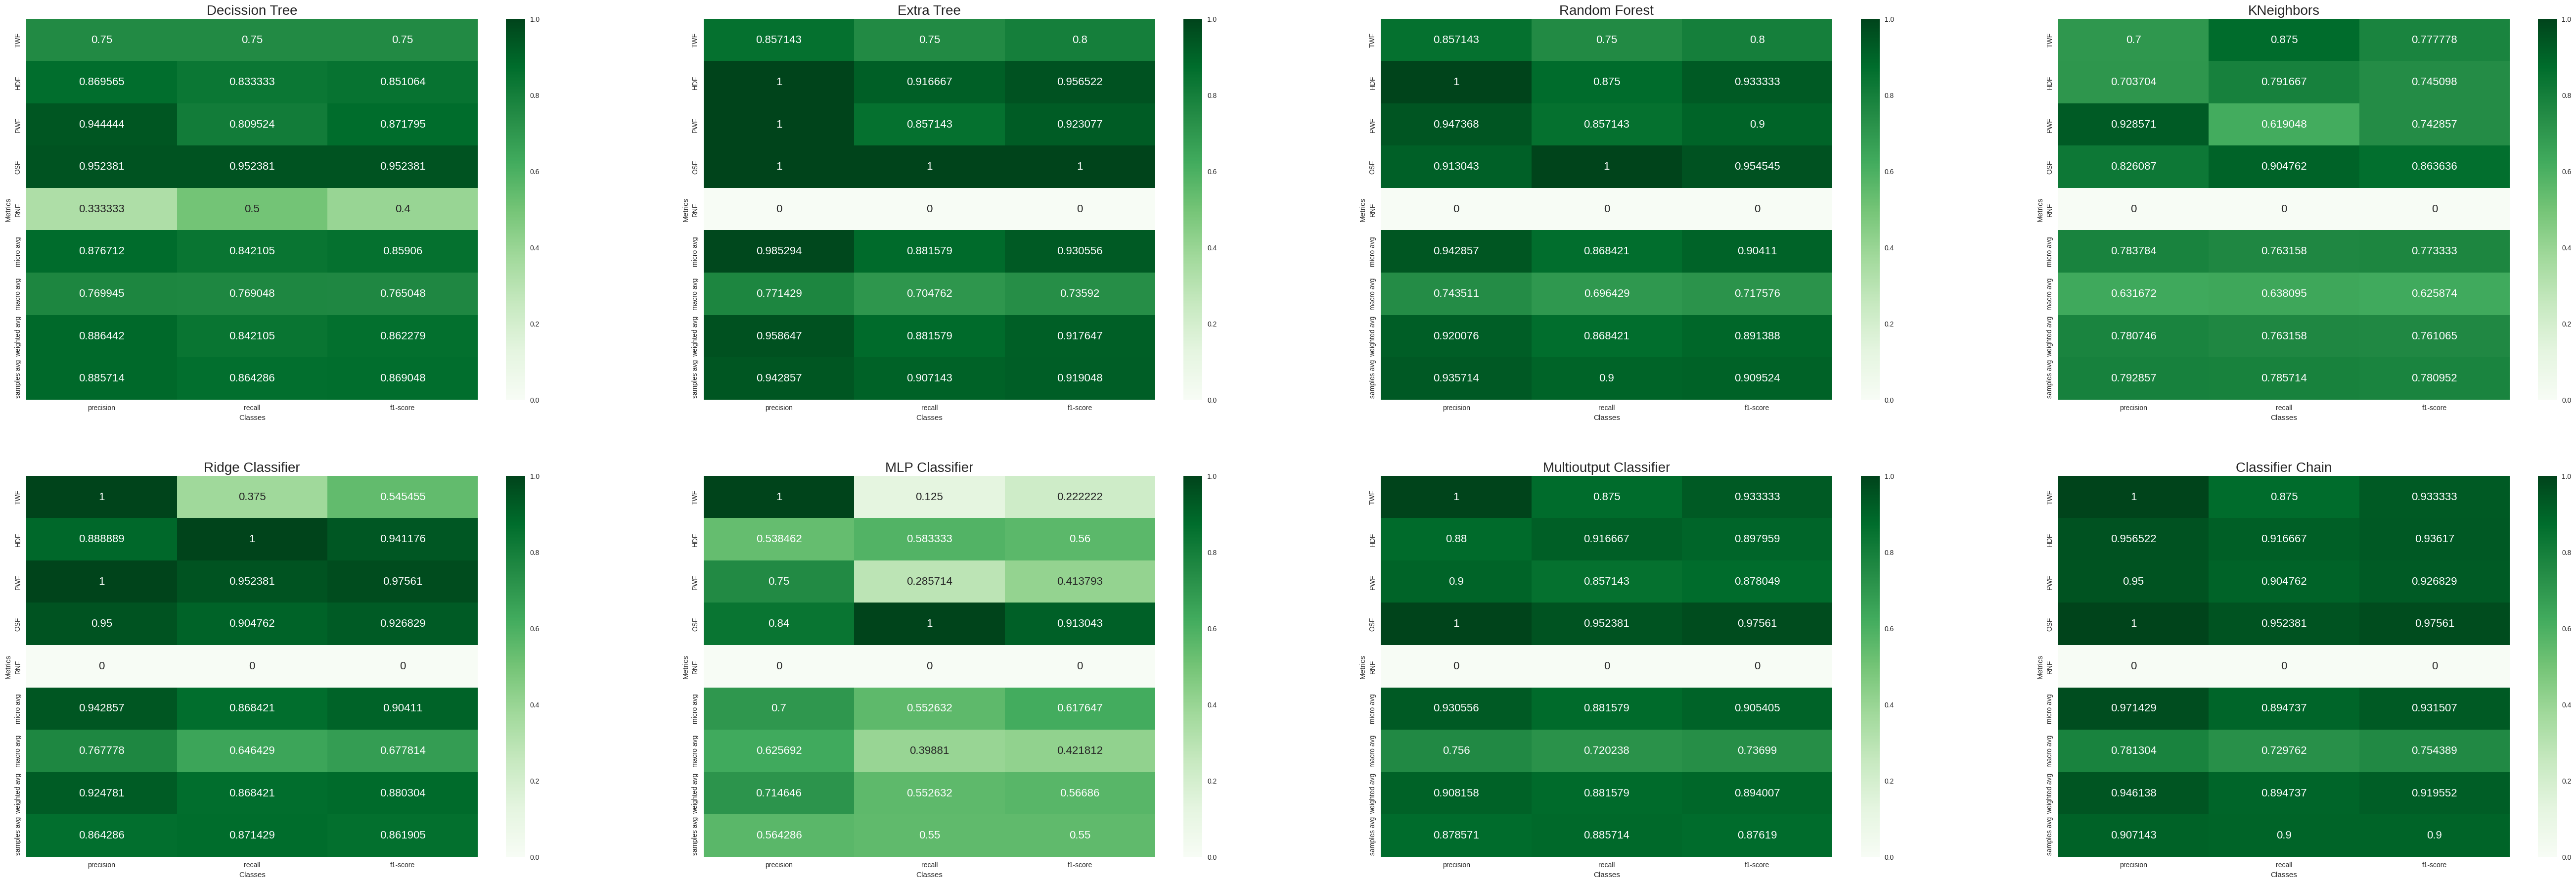

In [93]:
# Plotting confusion matrix for each classifier
target_names = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
conf_mx0 = classification_report(y_test, y_pred_dt, target_names=target_names, output_dict=True)
conf_mx1 = classification_report(y_test, y_pred_etc, target_names=target_names, output_dict=True)
conf_mx2 = classification_report(y_test, y_pred_rf, target_names=target_names, output_dict=True)
conf_mx3 = classification_report(y_test, y_pred_knn, target_names=target_names, output_dict=True)
conf_mx4 = classification_report(y_test, y_pred_rgc, target_names=target_names, output_dict=True)
conf_mx5 = classification_report(y_test, y_pred_mlpc, target_names=target_names, output_dict=True)
conf_mx6 = classification_report(y_test, y_pred_moc, target_names=target_names, output_dict=True)
conf_mx7 = classification_report(y_test, y_pred_cc, target_names=target_names, output_dict=True)

heat_cm0 = pd.DataFrame(conf_mx0).transpose()
heat_cm0.index.name = 'Metrics'
heat_cm0.columns.name = 'Classes'
heat_cm1 = pd.DataFrame(conf_mx1).transpose()
heat_cm1.index.name = 'Metrics'
heat_cm1.columns.name = 'Classes'
heat_cm2 = pd.DataFrame(conf_mx2).transpose()
heat_cm2.index.name = 'Metrics'
heat_cm2.columns.name = 'Classes'
heat_cm3 = pd.DataFrame(conf_mx3).transpose()
heat_cm3.index.name = 'Metrics'
heat_cm3.columns.name = 'Classes'
heat_cm4 = pd.DataFrame(conf_mx4).transpose()
heat_cm4.index.name = 'Metrics'
heat_cm4.columns.name = 'Classes'
heat_cm5 = pd.DataFrame(conf_mx5).transpose()
heat_cm5.index.name = 'Metrics'
heat_cm5.columns.name = 'Classes'
heat_cm6 = pd.DataFrame(conf_mx6).transpose()
heat_cm6.index.name = 'Metrics'
heat_cm6.columns.name = 'Classes'
heat_cm7 = pd.DataFrame(conf_mx7).transpose()
heat_cm7.index.name = 'Metrics'
heat_cm7.columns.name = 'Classes'


f, ax = plt.subplots(2, 4, figsize=(28,22))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)
vmin, vmax = 0, 1  # set the range for the color map

sns.heatmap(heat_cm0.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][0], vmin=vmin, vmax=vmax)
ax[0][0].set_title('Decission Tree', fontsize = 20)
sns.heatmap(heat_cm1.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][1], vmin=vmin, vmax=vmax)
ax[0][1].set_title('Extra Tree', fontsize = 20)
sns.heatmap(heat_cm2.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][2], vmin=vmin, vmax=vmax)
ax[0][2].set_title('Random Forest', fontsize = 20)
sns.heatmap(heat_cm3.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0][3], vmin=vmin, vmax=vmax)
ax[0][3].set_title('KNeighbors', fontsize = 20)
sns.heatmap(heat_cm4.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][0], vmin=vmin, vmax=vmax)
ax[1][0].set_title('Ridge Classifier', fontsize = 20)
sns.heatmap(heat_cm5.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][1], vmin=vmin, vmax=vmax)
ax[1][1].set_title('MLP Classifier', fontsize = 20)
sns.heatmap(heat_cm6.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][2], vmin=vmin, vmax=vmax)
ax[1][2].set_title('Multioutput Classifier', fontsize = 20)
sns.heatmap(heat_cm7.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1][3], vmin=vmin, vmax=vmax)
ax[1][3].set_title('Classifier Chain', fontsize = 20)


plt.show()

***

meskipun kedua model yang sebelumnya memiliki akurasi tertinggi, kedua algorithm ini belum mampu mengenali keseluruhan jenis kerusakan, terutama RNF. ditandai dengan adanya nilai 0 pada presisi, recall dan f1-score di masing-masing label.

***

### **5.2 Cross Validation**

In [95]:
from sklearn.metrics import accuracy_score

abc = []
train_scores = []
classifiers = ['Decission Tree', 'Extra Tree', 'Random Forest', 'KNN', 'Ridge Classifier', 'MLP Classifier', 'Multioutput Classifier', 'Classifier Chain']
models = [dt, etc, rf, knn, rgc, mlpc, moc, cc]

for i in models:
    model = i
    model.fit(X_train, y_train)  # fit the model on the training set
    y_pred_train = model.predict(X_train)  # predict the labels of the training set
    train_score = accuracy_score(y_train, y_pred_train)  # calculate the accuracy of the model on the training set
    train_scores.append(train_score)
    y_pred_test = model.predict(X_test)  # predict the labels of the training set
    test_score = accuracy_score(y_test, y_pred_test)  # calculate the accuracy of the model on the training set
    abc.append(test_score)

models_dataframe = pd.DataFrame(abc, index=classifiers, columns=['CV Accuracy'])
models_dataframe['Train Accuracy'] = train_scores
models_dataframe

,CV Accuracy,Train Accuracy
Decission Tree,0.842857,1.000000
Extra Tree,0.857143,1.000000
Random Forest,0.842857,1.000000
KNN,0.714286,0.737410
Ridge Classifier,0.814286,0.773381
MLP Classifier,0.614286,0.658273
Multioutput Classifier,0.828571,0.748201
Classifier Chain,0.871429,0.798561


## **6. Model Improvement**

### **6.1 Hyperparameter Tuning**

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
dt_param_mc = random_search.best_params_

# print best hyperparameters and corresponding score
print('Best hyperparameters: ', random_search.best_params_)
print('Best accuracy: ', random_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy:  0.8267532467532467


In [105]:
dt_param_mc = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [107]:
imp_dt_mc = DecisionTreeClassifier(**dt_param_mc)
imp_dt_mc.fit(X_train, y_train)
pred_imp_rf = imp_dt_mc.predict(X_test)

print("Improved MLP Classifiers's Accuracy: ", round(metrics.accuracy_score(y_test, pred_imp_rf), 2))
print(classification_report(y_test, pred_imp_rf))

Improved MLP Classifiers's Accuracy:  0.83
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.91      0.83      0.87        24
           2       1.00      0.76      0.86        21
           3       0.91      1.00      0.95        21
           4       1.00      0.50      0.67         2

   micro avg       0.91      0.84      0.88        76
   macro avg       0.91      0.77      0.82        76
weighted avg       0.92      0.84      0.87        76
 samples avg       0.90      0.86      0.88        76



### **6.3 Cross Validation**

In [109]:
from sklearn.metrics import accuracy_score

abc = []
train_scores = []
classifiers = ['Random Forest']
models = [imp_dt_mc]

for i in models:
    model = i
    model.fit(X_train, y_train)  # fit the model on the training set
    y_pred_train = model.predict(X_train)  # predict the labels of the training set
    train_score = accuracy_score(y_train, y_pred_train)  # calculate the accuracy of the model on the training set
    train_scores.append(train_score)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    abc.append(scores.mean())

models_dataframe = pd.DataFrame(abc, index=classifiers, columns=['CV Accuracy'])
models_dataframe['Train Accuracy'] = train_scores
models_dataframe

,CV Accuracy,Train Accuracy
Random Forest,0.758344,0.935252


### **6.4 Classification Report**

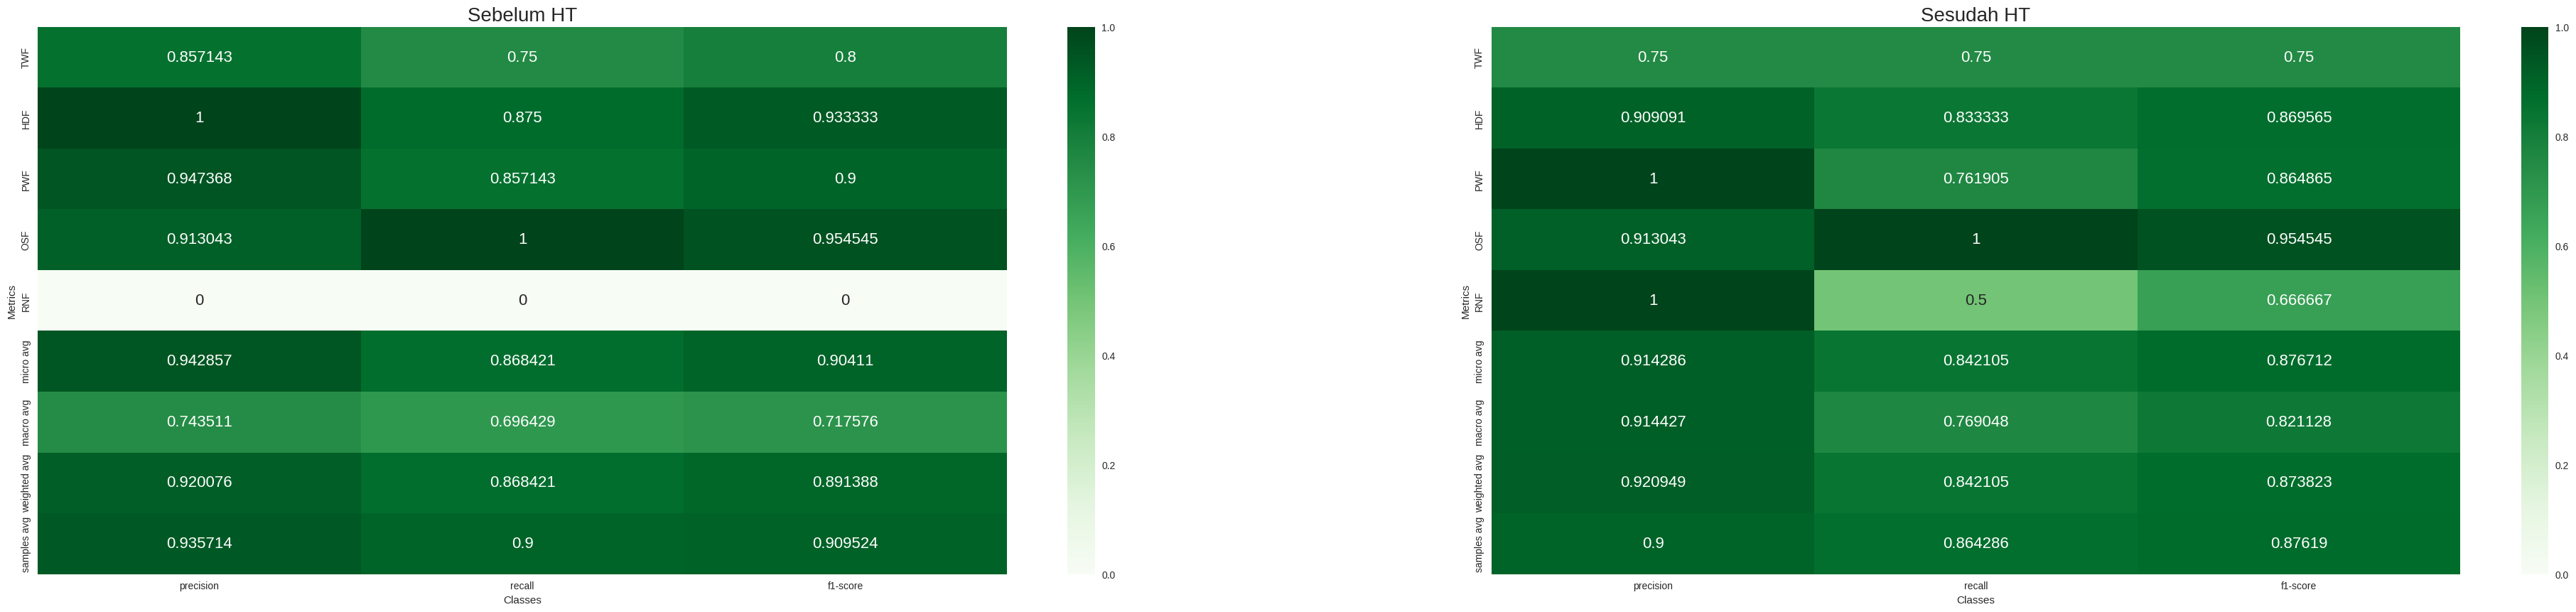

In [110]:
# Plotting confusion matrix for each classifier
target_names = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
conf_mx0 = classification_report(y_test, y_pred_rf, target_names=target_names, output_dict=True)
conf_mx1 = classification_report(y_test, pred_imp_rf, target_names=target_names, output_dict=True)

heat_cm0 = pd.DataFrame(conf_mx0).transpose()
heat_cm0.index.name = 'Metrics'
heat_cm0.columns.name = 'Classes'
heat_cm1 = pd.DataFrame(conf_mx1).transpose()
heat_cm1.index.name = 'Metrics'
heat_cm1.columns.name = 'Classes'


f, ax = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)
vmin, vmax = 0, 1  # set the range for the color map

sns.heatmap(heat_cm0.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0], vmin=vmin, vmax=vmax)
ax[0].set_title('Sebelum HT', fontsize = 20)
sns.heatmap(heat_cm1.iloc[:, :-1], cmap="Greens", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1], vmin=vmin, vmax=vmax)
ax[1].set_title('Sesudah HT', fontsize = 20)

plt.show()

In [111]:
from sklearn.metrics import multilabel_confusion_matrix

# assuming y_true and y_pred are the true and predicted labels for the test set
cm1 = multilabel_confusion_matrix(y_test, y_pred_rf)
cm2 = multilabel_confusion_matrix(y_test, pred_imp_rf)

# print the confusion matrix for the first label
print('Confusion matrix sebelum HT\n', cm1)
print('Confusion matrix sesudah HT\n', cm2)

Confusion matrix sebelum HT
 [[[61  1]
  [ 2  6]]

 [[46  0]
  [ 3 21]]

 [[48  1]
  [ 3 18]]

 [[47  2]
  [ 0 21]]

 [[68  0]
  [ 2  0]]]
Confusion matrix sesudah HT
 [[[60  2]
  [ 2  6]]

 [[44  2]
  [ 4 20]]

 [[49  0]
  [ 5 16]]

 [[47  2]
  [ 0 21]]

 [[68  0]
  [ 1  1]]]


### **6.5 Feature Importance**

In [112]:
importance = imp_dt_mc.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_df

,Feature,Importance
0,torque_nm,0.287665
1,tool_wear_min,0.257739
2,rotational_speed_rpm,0.192112
3,air_temperature_c,0.189059
4,process_temperature_c,0.073426
5,type,0.000000


## **7. Model Deployment - (Unfinished)**

In [ ]:
while True:
    # Memasukkan nilai fitur
    tipe = int(input("Masukkan tipe produk: "))
    process_temp = float(input("Masukkan suhu proses mesin produksi: "))
    air_temp = float(input("Masukkan suhu udara sekitar mesin produksi: "))
    rotational_speed = float(input("Masukkan kecepatan putar mesin produksi: "))
    torque_nm = float(input("Masukkan torsi yang dihasilkan oleh mesin produksi: "))
    tool_wear_min = int(input("Masukkan waktu pemakaian tool pada mesin produksi: "))

    # Membuat prediksi menggunakan model dan threshold
    predict_bc = [[tipe, process_temp, air_temp, rotational_speed, torque_nm, tool_wear_min]]
    #result = predict_with_threshold(best_rf, predict, 0.5)
    rslt = best_rf_bc.predict(predict_bc)

    # Menampilkan hasil prediksi
    if rslt == 1:
        print("Mesin Mengalami Kegagalan.")
    else:
        print("Mesin Tidak Mengalami Kegagalan.")

    # Menanyakan apakah ingin melanjutkan input
    choice = input("Apakah Anda ingin melanjutkan input? (y/n) ")
    if choice.lower() != 'y':
        break

In [ ]:
cols = list(df.columns)
unseen_data = pd.DataFrame(columns = cols)
unseen_data

,type_encode,process_temperature_c,air_temperature_c,temperature_difference,rotational_speed_rpm,torque_nm,tool_wear_min,TWF,HDF,PWF,OSF,RNF


In [ ]:
# Membuat prediksi menggunakan model dan threshold
predict_bc =  [[0,	35.85,	25.75,	1410,	65.7,	241	]]
#result = predict_with_threshold(best_rf, predict, 0.5)
rslt = best_rf_bc.predict(predict_bc)

# Menampilkan hasil prediksi
if rslt == 1:
  print("Mesin Mengalami Kegagalan.")
  temperature_diff = predict_bc[0][1] - predict_bc[0][2]
  predict_mc = predict_bc[0].copy()
  predict_mc.insert(3, temperature_diff)
  predict_mc = np.array([predict_mc])
  result = imp_rf_mc.predict(predict_mc)
  print(result)
else:
  print("Mesin Tidak Mengalami Kegagalan.")


Mesin Mengalami Kegagalan.
[[0 0 0 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
a = np.array([[0,	35.85,	25.75,	10.1,	1410,	65.7,	191	]])

In [ ]:
b = imp_rf_mc.predict(a)
# Reshape array b to match the shape of array a
b_reshaped = np.repeat(b, a.shape[0], axis=0)

# Concatenate the two arrays
merged_array = np.concatenate((a, b_reshaped), axis=1)
merged_array

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.000e+00, 3.585e+01, 2.575e+01, 1.010e+01, 1.410e+03, 6.570e+01,
        1.910e+02, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00]])

In [ ]:
index = len(unseen_data)
unseen_data.loc[index] = merged_array[0]
unseen_data

,type_encode,process_temperature_c,air_temperature_c,temperature_difference,rotational_speed_rpm,torque_nm,tool_wear_min,TWF,HDF,PWF,OSF,RNF
0,0.0,35.85,25.75,10.1,1410.0,65.7,191.0,0.0,0.0,1.0,1.0,0.0
